### Mobile Price Prediction 

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [148]:
## loading dataset
df=pd.read_csv('ndtv_dataset.csv')
df.head()

,3G,4g/ Lte,Battery capacity (mAh),Battery capacity (mAh) (bin),Bluetooth,Brand,F1,Front camera,GPS,Internal storage (GB),...,Processor,Ram (Mb),Rear camera,Resolution,Resolution x,Resolution y,Screen size (inches),Touchscreen,Wi-Fi,Price
0,Yes,Yes,4000,4000,Yes,Realme,1,16.0,Yes,64,...,8,6000,64,1080X2400,1080,2400,6.50,Yes,Yes,27999
1,Yes,Yes,3765,3500,Yes,Oppo,10,16.0,Yes,64,...,8,6000,16,1080X2340,1080,2340,6.50,Yes,Yes,23990
2,Yes,Yes,3765,3500,Yes,Realme,11,16.0,Yes,128,...,8,4000,48,1080X2340,1080,2340,6.53,Yes,Yes,14999
3,Yes,Yes,4045,4000,Yes,Realme,15,25.0,Yes,64,...,8,4000,16,1080X2340,1080,2340,6.30,Yes,Yes,13999
4,Yes,Yes,4000,4000,Yes,Xiaomi,17,13.0,Yes,64,...,8,4000,48,1080X2340,1080,2340,6.30,Yes,Yes,9799


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   3G                            988 non-null    object 
 1   4g/ Lte                       988 non-null    object 
 2   Battery capacity (mAh)        988 non-null    int64  
 3   Battery capacity (mAh) (bin)  988 non-null    int64  
 4   Bluetooth                     988 non-null    object 
 5   Brand                         988 non-null    object 
 6   F1                            988 non-null    int64  
 7   Front camera                  988 non-null    float64
 8   GPS                           988 non-null    object 
 9   Internal storage (GB)         988 non-null    int64  
 10  Number of SIMs                988 non-null    int64  
 11  Operating system              988 non-null    object 
 12  Processor                     988 non-null    int64  
 13  Ram (

In [150]:
df.describe()

,Battery capacity (mAh),Battery capacity (mAh) (bin),F1,Front camera,Internal storage (GB),Number of SIMs,Processor,Ram (Mb),Rear camera,Resolution x,Resolution y,Screen size (inches),Price
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,2924.321862,2807.692308,734.019231,6.590587,24.578947,1.884615,5.607287,2273.295547,11.073887,780.133603,1415.624494,5.267540,8089.783401
std,823.162684,874.588650,372.492787,5.209218,23.084288,0.319647,1.962058,1308.306415,6.881072,231.070769,466.452769,0.558011,5169.811405
min,1300.000000,1000.000000,1.000000,0.000000,4.000000,1.000000,4.000000,512.000000,2.000000,240.000000,480.000000,4.000000,1999.000000
25%,2300.000000,2000.000000,408.750000,5.000000,8.000000,2.000000,4.000000,1000.000000,8.000000,720.000000,1280.000000,5.000000,4530.000000
50%,2900.000000,2500.000000,767.500000,5.000000,16.000000,2.000000,4.000000,2000.000000,12.500000,720.000000,1280.000000,5.200000,6647.500000
75%,3400.000000,3000.000000,1051.250000,8.000000,32.000000,2.000000,8.000000,3000.000000,13.000000,1080.000000,1920.000000,5.500000,9821.750000
max,5100.000000,5000.000000,1358.000000,32.000000,128.000000,2.000000,8.000000,8000.000000,64.000000,1520.000000,2960.000000,6.530000,37999.000000


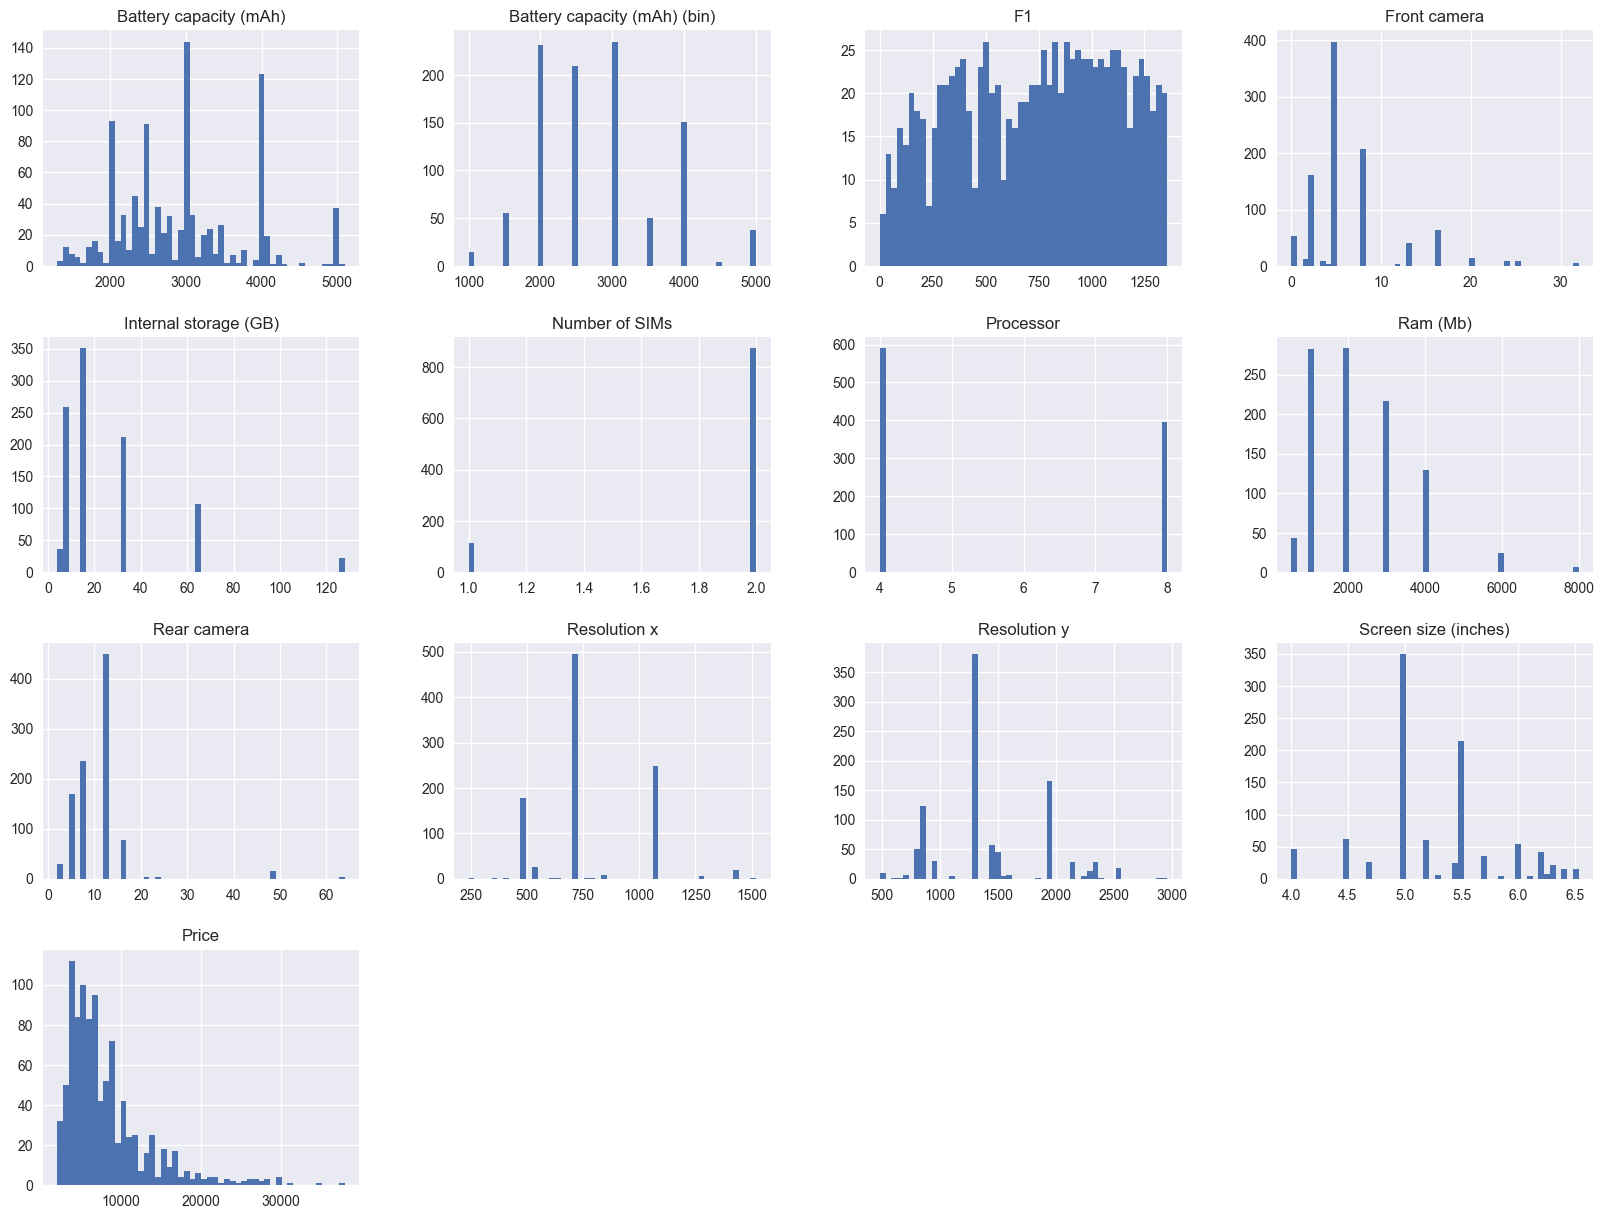

In [151]:
## Density plot for all the features
plt.style.use('seaborn-v0_8') 
df.hist(bins=50, figsize=(20, 15))
plt.show()

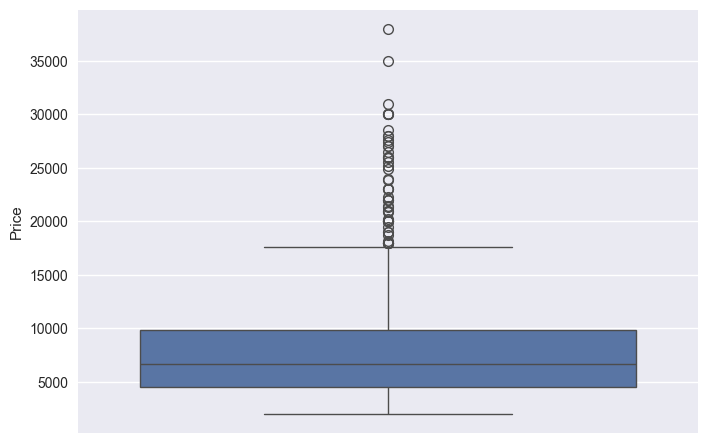

In [152]:
## Box PLots
sns.boxplot(df['Price'])
plt.show()

In [153]:
df=pd.read_csv("ndtv_dataset.csv")
df_copy=df.copy()

df=df.astype({'Front camera':'object','Number of SIMs':'object','Processor':'object','Rear camera':'object'})
df.drop(['F1','3G', '4g/ Lte', 'Bluetooth', 'GPS', 'Touchscreen', 'Wi-Fi','Resolution', 'Resolution x', 'Resolution y','Battery capacity (mAh) (bin)'],axis=1,inplace=True)
df=pd.get_dummies(df,drop_first=True)

### Train Test Split

In [154]:
X=df.drop('Price',axis=1)
y=df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

### Linear Regression

In [155]:
reg=LinearRegression()
reg.fit(X_train,y_train)
trainpred=reg.predict(X_train)
testpred=reg.predict(X_test)
trainscore=reg.score(X_train,y_train)
testscore=reg.score(X_test,y_test)

In [156]:
print("Train score :", trainscore)
print("Test score : ", testscore)

Train score : 0.6628335546920776
Test score :  0.361395338117769


### Ridge Regression

In [157]:
Q=[i for i in range(1,1000)]
for i in Q:
    rr = Ridge(alpha=i)
    model = rr.fit(X_train,y_train)
    tr_pred = model.predict(X_train)
    ts_pred = model.predict(X_test)
    ts_score = rr.score(X_test,y_test)
    tr_score = rr.score(X_train,y_train)
    print("alpha",i,"\ttr_Score",round(tr_score,4),"\tts_Score",round(ts_score,4))

alpha 1 	tr_Score 0.6537 	ts_Score 0.4152
alpha 2 	tr_Score 0.6432 	ts_Score 0.4391
alpha 3 	tr_Score 0.6338 	ts_Score 0.4523
alpha 4 	tr_Score 0.6255 	ts_Score 0.4603
alpha 5 	tr_Score 0.6183 	ts_Score 0.4654
alpha 6 	tr_Score 0.6119 	ts_Score 0.4689
alpha 7 	tr_Score 0.6062 	ts_Score 0.4713
alpha 8 	tr_Score 0.6011 	ts_Score 0.473
alpha 9 	tr_Score 0.5965 	ts_Score 0.4742
alpha 10 	tr_Score 0.5922 	ts_Score 0.475
alpha 11 	tr_Score 0.5883 	ts_Score 0.4756
alpha 12 	tr_Score 0.5847 	ts_Score 0.476
alpha 13 	tr_Score 0.5814 	ts_Score 0.4762
alpha 14 	tr_Score 0.5783 	ts_Score 0.4763
alpha 15 	tr_Score 0.5753 	ts_Score 0.4763
alpha 16 	tr_Score 0.5726 	ts_Score 0.4763
alpha 17 	tr_Score 0.57 	ts_Score 0.4761
alpha 18 	tr_Score 0.5675 	ts_Score 0.476
alpha 19 	tr_Score 0.5652 	ts_Score 0.4758
alpha 20 	tr_Score 0.563 	ts_Score 0.4755
alpha 21 	tr_Score 0.5608 	ts_Score 0.4753
alpha 22 	tr_Score 0.5588 	ts_Score 0.475
alpha 23 	tr_Score 0.5569 	ts_Score 0.4747
alpha 24 	tr_Score 0.555 	ts

### Lasso Regression

In [158]:
Q=[i for i in range(1,1000)]
for i in Q:
    ls = Lasso(alpha=i)
    model = ls.fit(X_train,y_train)
    tr_pred = model.predict(X_train)
    ts_pred = model.predict(X_test)
    ts_score = ls.score(X_test,y_test)
    tr_score = ls.score(X_train,y_train)
    print("alpha",i,"\ttr_Score",round(tr_score,4),"\tts_Score",round(ts_score,4))

alpha 1 	tr_Score 0.662 	ts_Score 0.3692
alpha 2 	tr_Score 0.6601 	ts_Score 0.3759
alpha 3 	tr_Score 0.658 	ts_Score 0.3797
alpha 4 	tr_Score 0.6555 	ts_Score 0.3816
alpha 5 	tr_Score 0.6526 	ts_Score 0.3833
alpha 6 	tr_Score 0.6493 	ts_Score 0.3842
alpha 7 	tr_Score 0.6463 	ts_Score 0.3848
alpha 8 	tr_Score 0.6432 	ts_Score 0.385
alpha 9 	tr_Score 0.6397 	ts_Score 0.3848
alpha 10 	tr_Score 0.6361 	ts_Score 0.3847
alpha 11 	tr_Score 0.6323 	ts_Score 0.3846
alpha 12 	tr_Score 0.6288 	ts_Score 0.3849
alpha 13 	tr_Score 0.6255 	ts_Score 0.3854
alpha 14 	tr_Score 0.6224 	ts_Score 0.3863
alpha 15 	tr_Score 0.6198 	ts_Score 0.3883
alpha 16 	tr_Score 0.6172 	ts_Score 0.3901
alpha 17 	tr_Score 0.6145 	ts_Score 0.3918
alpha 18 	tr_Score 0.612 	ts_Score 0.3936
alpha 19 	tr_Score 0.6095 	ts_Score 0.3953
alpha 20 	tr_Score 0.6069 	ts_Score 0.3968
alpha 21 	tr_Score 0.6043 	ts_Score 0.3983
alpha 22 	tr_Score 0.6018 	ts_Score 0.3996
alpha 23 	tr_Score 0.5994 	ts_Score 0.4008
alpha 24 	tr_Score 0.596

### Cross Validation

In [159]:
Q=[(1+i/10) for i in range(1,1000)]
tuning_grid = {"alpha":Q}
ls = Ridge()

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(ls,tuning_grid,scoring="neg_mean_squared_error",cv=4)

cvmodel = cv.fit(X,y)
cvmodel.best_params_

{'alpha': 3.1}

In [160]:
tuning_grid = {"alpha":[3.1]}
ls = Ridge()

cv = GridSearchCV(ls,tuning_grid,scoring="neg_mean_squared_error",cv=4)

cvmodel = cv.fit(X,y)
cv.predict(X)

array([17971.73394293, 16265.24575734, 15352.70131668, 12449.05009897,
       11326.52376973, 21950.17758148, 10201.18353599, 15858.2731301 ,
       11519.19894139, 14012.31023518, 19909.47907772, 17748.42077199,
       10615.25744005, 18075.25321609, 18387.91114513, 17637.1507131 ,
       20386.69494129, 15208.21999793, 18481.0369167 ,  7485.35047484,
       11886.56457471,  7485.35047484,  6366.01684109, 13635.2853203 ,
       12445.09586842, 14215.41051353, 15461.67418713, 14677.85485338,
       10600.44774503, 16595.49006161, 13120.06357625, 11755.14915795,
       12389.0216467 ,  9007.77906275, 14735.25961514, 15861.86908539,
       21856.11620457, 10636.57705926,  9354.88771163, 11844.29010329,
       11850.58545971, 19734.14185545, 12680.00571597,  9427.9298321 ,
       20130.25199282, 14154.38506608, 12733.47697799, 13153.1884697 ,
       15555.35518364, 11558.3863    , 22862.22617239, 14142.47619827,
        9580.45163759, 11731.46717009, 17932.20835672, 19506.53950746,
      